In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

In [3]:
concrete = pd.read_csv('concrete.csv')

In [6]:
concrete.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
concrete.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [9]:
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cement               1030 non-null   float64
 1   BlastFurnaceSlag     1030 non-null   float64
 2   FlyAsh               1030 non-null   float64
 3   Water                1030 non-null   float64
 4   Superplasticizer     1030 non-null   float64
 5   CoarseAggregate      1030 non-null   float64
 6   FineAggregate        1030 non-null   float64
 7   Age                  1030 non-null   int64  
 8   CompressiveStrength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [25]:
concrete.columns

Index(['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
       'CoarseAggregate', 'FineAggregate', 'Age', 'CompressiveStrength'],
      dtype='object')

In [56]:
X = concrete[['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer','CoarseAggregate', 'FineAggregate', 'Age']]
y = concrete['CompressiveStrength']

In [68]:
X = sm.add_constant(X)

In [80]:
model = sm.OLS(y,X).fit()

In [81]:
predictions = model.predict(X)

In [83]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
=====================================================================
Model:              OLS                 Adj. R-squared:     0.613    
Dependent Variable: CompressiveStrength AIC:                7755.9240
Date:               2020-12-26 13:21    BIC:                7800.3598
No. Observations:   1030                Log-Likelihood:     -3869.0  
Df Model:           8                   F-statistic:        204.3    
Df Residuals:       1021                Prob (F-statistic): 6.29e-206
R-squared:          0.616               Scale:              108.14   
---------------------------------------------------------------------
                     Coef.   Std.Err.    t    P>|t|   [0.025   0.975]
---------------------------------------------------------------------
const               -23.3312  26.5855 -0.8776 0.3804 -75.4997 28.8373
Cement                0.1198   0.0085 14.1129 0.0000   0.1031  0.1365
BlastFurnaceSlag      0.1039   0.0101 10.2474 0.0000   0.0840  0.1238
FlyAsh                0.0879   0.0126  6.9882 0.0000   0.0632  0.1126
Water                -0.1499   0.0402 -3.7314 0.0002  -0.2288 -0.0711
Superplasticizer      0.2922   0.0934  3.1279 0.0018   0.1089  0.4755
CoarseAggregate       0.0181   0.0094  1.9257 0.0544  -0.0003  0.0365
FineAggregate         0.0202   0.0107  1.8867 0.0595  -0.0008  0.0412
Age                   0.1142   0.0054 21.0464 0.0000   0.1036  0.1249
---------------------------------------------------------------------
Omnibus:                5.378         Durbin-Watson:           1.282 
Prob(Omnibus):          0.068         Jarque-Bera (JB):        5.304 
Skew:                   -0.174        Prob(JB):                0.071 
Kurtosis:               3.045         Condition No.:           106075
=====================================================================
* The condition number is large (1e+05). This might indicate
strong multicollinearity or other numerical problems.
"""

In [84]:
# Adjusted R Square : R Square tends to increase even if the additional input do not add any value to the model. Adjusted R ßquare compensates for it. 
# R Square measures the proportion of variability explained by feautre on the target. 

# R Square = 1 - (SSE/SST)
# Adjusted R Square = 1 - [(1-Rsquare)(n-1)/(n-k-1)]

# n : number of samples
# k : number of features

# Adj. R Sqaure pf 0.613 means 61 % of variatios in the increase in compresive strength is explained by the features used in the model

In [92]:
# AIC and BIC will be used when we have different models to compare.

# AIC determines the relative informational value of the model using the maximum likelihood estimation and number of features
# AIC = 2k - 2ln(L) where k is the number of features and L is the maximum likelihood estimation
# For a number of different model, AIC with the lowest value will be chosen as the best model

# BIC similar as AIC but based on Bayesian estimates. Similarly the lowest value be chosen.

In [93]:
# Std. Error of the variable measures how much uncertainity is asscoaited with each variable. Lower the better.
# t stat is coefficient / std. error. Cememnt stands 14 std. deviation from Zero. 
# p >|t| means the p value of each variable and how significant are these variables
# [0.025 0.975] : The range for confidence for each variable. For example in case of "age" , we are 95% confident that a one year increase in age 
# will correspond to 0.1026 and 0.1249 increase in compressive strength, while keeping other factors constant

In [94]:
# we can see from the above model that "Fine Aggregate" and "Coarse Aggregate" has p value much higher and 95% confidennce has 0 in the range. 
# Let's remove these two feature and run the model again to see if we improved.

In [100]:
X = concrete[['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer','Age']]
y = concrete['CompressiveStrength']
X = sm.add_constant(X)

In [101]:
model = sm.OLS(y,X).fit()

In [102]:
predictions = model.predict(X)

In [103]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
=====================================================================
Model:              OLS                 Adj. R-squared:     0.612    
Dependent Variable: CompressiveStrength AIC:                7755.9279
Date:               2020-12-26 18:21    BIC:                7790.4891
No. Observations:   1030                Log-Likelihood:     -3871.0  
Df Model:           6                   F-statistic:        271.2    
Df Residuals:       1023                Prob (F-statistic): 1.67e-207
R-squared:          0.614               Scale:              108.35   
---------------------------------------------------------------------
                      Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
---------------------------------------------------------------------
const                28.9930   4.2132   6.8815 0.0000 20.7255 37.2605
Cement                0.1054   0.0042  24.8248 0.0000  0.0971  0.1137
BlastFurnaceSlag      0.0865   0.0050  17.3854 0.0000  0.0767  0.0962
FlyAsh                0.0687   0.0077   8.8766 0.0000  0.0535  0.0838
Water                -0.2181   0.0211 -10.3215 0.0000 -0.2596 -0.1766
Superplasticizer      0.2403   0.0846   2.8417 0.0046  0.0744  0.4063
Age                   0.1135   0.0054  20.9880 0.0000  0.1029  0.1241
---------------------------------------------------------------------
Omnibus:               5.229          Durbin-Watson:            1.286
Prob(Omnibus):         0.073          Jarque-Bera (JB):         5.189
Skew:                  -0.174         Prob(JB):                 0.075
Kurtosis:              3.019          Condition No.:            4662 
=====================================================================
* The condition number is large (5e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

In [ ]:
# The new model's Adjusted R Square is still same at 61 % so no improvements.
# The coefficient for "Cemenrt" is 0.1054 with 95% CI between 0.0971 and 0.1137 it means that with one unit increase in cement , the Compressive Strength increase by 0.1054
# Also the 95 % CI tells that if we repeat this procedure numerous times, around 95 % probablity that caluclated CI from some future experiments encompasses the value of cement coefficient 
# between 0.09 and 0.11

In [104]:
# SST : Sum of Square Total : Sum of Squared difference between the observed dependent variable and its mean of dependent variable
# SSR : Sum of Square due to Regression : Sum of the squared difference between the predicated value and mean of the dependent variable
# SSE : Sum of Square Error : Sum of squared between the observed value and the predicted value
# SST = SSE + SSR

In [105]:
concrete.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


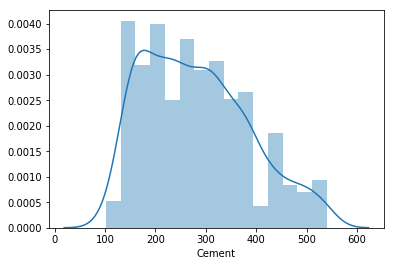

In [ ]:
# Let's see if we can improve model performance by "feature scaling" the features.
# There are two main types of feature scaling 

# Resacling

# Normalization changes the scale of model

# x norm = (x-min(x))/ (max(x)-min(x))

